## Load the data <a href='https://www.tensorflow.org/tutorials/keras/classification'>Fashion Mnist Documentation</a>

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load data into train and test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

## Exlore the data

In [9]:
# Check the shape of the data
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [10]:
# Check the shape of a single sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [11]:
# Check to see how a single data sample looks
import pandas as pd
pd.DataFrame(train_data[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [12]:
# Check the lable of a single sample
train_labels[0]

9

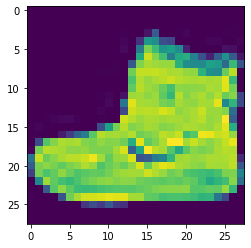

In [13]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

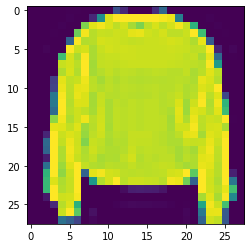

In [14]:
# Plot a single sample
plt.imshow(train_data[7]);

In [15]:
# Check out the label for the single sample
train_labels[7]

2

In [16]:
# Create a human-readable list for data labels
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Check the number of classes
len(class_names)



10

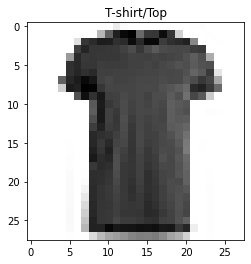

In [17]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

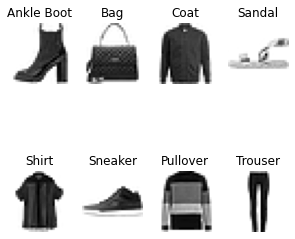

In [18]:
# Plot multiple random images of fasion MNISt
import random
plt.figure(figsize=(5, 5))

for i in range(8):
  ax = plt.subplot(2, 4, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

In [19]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.models.Sequential()

# Add input layer, reshaping the input from (28, 28) to (None, 784)
model_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Add hidden layers
model_1.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add the last layer
model_1.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.categorical_accuracy])

# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_1 = model_1.fit(train_data, train_labels, epochs=10,
            validation_data=(test_data, test_labels),\
            verbose=1)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3443 - categorical_accuracy: 0.1275 - val_loss: 2.3040 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - categorical_accuracy: 0.0640 - val_loss: 2.3048 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - categorical_accuracy: 0.1061 - val_loss: 2.3040 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3040 - categorical_accuracy: 0.1285 - val_loss: 2.3043 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3039 - categorical_accuracy: 0.0811 - val_loss: 2.3028 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3039 - categorical_accuracy: 0.1051 - val_loss: 2.3035 - val_c

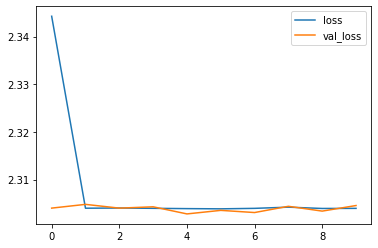

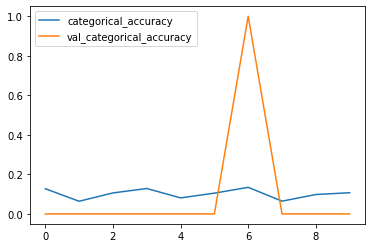

In [21]:
pd.DataFrame(history_1.history).loc[:, ['loss', 'val_loss']].plot()
pd.DataFrame(history_1.history).loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

## Normalizing the data

In [22]:
train_data.min(), train_data.max()

(0, 255)

In [23]:
# Normalize data by diving train and testy data by 255
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [24]:
# Create the model
model_2 = tf.keras.models.Sequential()

# Add input layer and reshape the input from (28, 28) to (None, 784)
model_2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Add hidden layers
model_2.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_2.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add the output layer
model_2.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.metrics.categorical_accuracy])

# print the model summary
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fit the model with normalized data
history_2 = model_2.fit(train_data_norm, train_labels, epochs=10,
                        validation_data=(test_data_norm, test_labels),
                        verbose=0)

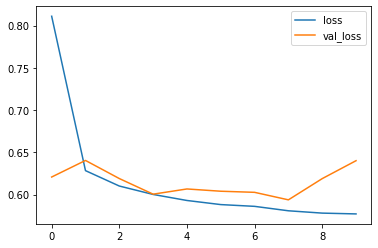

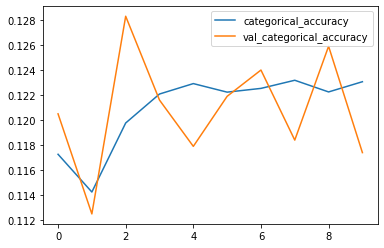

In [26]:
pd.DataFrame(history_2.history).loc[:, ['loss', 'val_loss']].plot()
pd.DataFrame(history_2.history).loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot()

## Finding the ideal learning rate

In [36]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.models.Sequential()

# Add input layer and reshape input from (28, 28) to (None, 784)
model_3.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Add hidden layers
model_3.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_3.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add output layer
model_3.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.metrics.categorical_accuracy])

# Print the model summary
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

# Fit the model
history_3 = model_3.fit(train_data_norm, train_labels, epochs=40,
                        validation_data=(test_data_norm, test_labels),
                        callbacks=[lr_scheduler],
                        verbose=0)

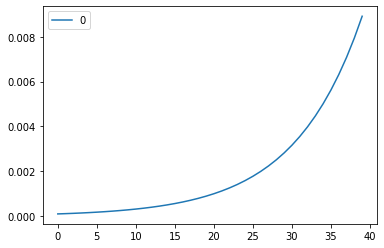

In [38]:
# Plot the learning rate decay curve
lrs = 1e-4 * 10**(tf.range(40)/20)
pd.DataFrame(lrs).plot();

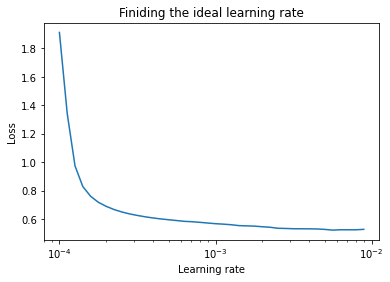

In [39]:
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss');
plt.title('Finiding the ideal learning rate');

In [40]:
ideal_learning_rate = 1e-3

## Create the model with the ideal learning  rate

In [93]:
# Create the model
model_4 = tf.keras.models.Sequential()

# Add input layer
model_4.add(tf.keras.layers.InputLayer(input_shape=(28, 28)))

# Add Flatten layer and reshape the input from (28, 28) to (None, 784)
model_4.add(tf.keras.layers.Flatten())

# Add hidden layers
model_4.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))
model_4.add(tf.keras.layers.Dense(units=4, activation=tf.keras.activations.relu))

# Add output layer
model_4.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ideal_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.metrics.categorical_accuracy])

# Print the model history
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Fit the model
model_4.fit(train_data_norm, train_labels, epochs=20,
            validation_data=(test_data_norm, test_labels),
            verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2017 - categorical_accuracy: 0.1156 - val_loss: 0.8631 - val_categorical_accuracy: 0.1098
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7725 - categorical_accuracy: 0.1076 - val_loss: 0.7401 - val_categorical_accuracy: 0.0933
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6818 - categorical_accuracy: 0.1053 - val_loss: 0.6837 - val_categorical_accuracy: 0.0862
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6321 - categorical_accuracy: 0.1036 - val_loss: 0.6408 - val_categorical_accuracy: 0.0967
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6020 - categorical_accuracy: 0.1028 - val_loss: 0.6343 - val_categorical_accuracy: 0.0980
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5788 - categorical_accuracy: 0.1028 - val_loss: 0.6082 - val_categorical_accuracy:

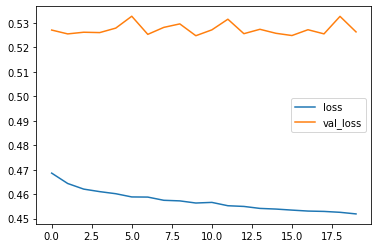

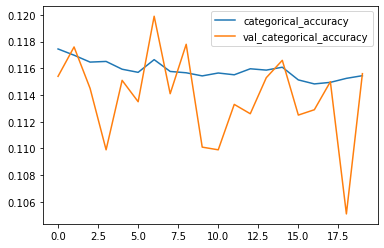

In [95]:
pd.DataFrame(history_4.history).loc[:, ['loss', 'val_loss']].plot()
pd.DataFrame(history_4.history).loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot()

## Evaluting the multiclass classification model

In [96]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [97]:
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [98]:
# Make predictions
y_probs = model_4.predict(test_data_norm)

# View the first five fata of y_probs
y_probs[:5]

array([[5.1680781e-05, 3.2277072e-07, 1.8865781e-05, 5.7144946e-04,
        2.2680028e-06, 4.4920406e-01, 8.2026476e-05, 1.5084541e-01,
        6.4886891e-04, 3.9857504e-01],
       [4.7056781e-04, 1.8134235e-08, 8.4149200e-01, 3.8796014e-05,
        2.5449380e-02, 4.3811427e-20, 1.3250671e-01, 2.1587998e-37,
        4.2558848e-05, 0.0000000e+00],
       [1.8161805e-03, 9.9809808e-01, 3.1695019e-10, 3.5152772e-07,
        8.2592628e-08, 3.0309677e-09, 4.3031770e-05, 2.1365175e-24,
        4.2185617e-05, 7.1573658e-10],
       [5.4777181e-03, 9.9406564e-01, 2.0592035e-08, 1.2552075e-05,
        2.1778374e-06, 1.4974147e-07, 2.8507560e-04, 2.2391828e-19,
        1.5662503e-04, 5.9195347e-08],
       [1.8734579e-01, 2.3812701e-03, 7.0659406e-02, 2.3150858e-02,
        2.4385925e-02, 8.7724612e-11, 6.8534386e-01, 2.1802705e-23,
        6.7329160e-03, 6.8982258e-27]], dtype=float32)

In [99]:
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([5.1680781e-05, 3.2277072e-07, 1.8865781e-05, 5.7144946e-04,
        2.2680028e-06, 4.4920406e-01, 8.2026476e-05, 1.5084541e-01,
        6.4886891e-04, 3.9857504e-01], dtype=float32), 'Sandal')

In [100]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds

array([5, 2, 1, ..., 8, 1, 5])

In [101]:
[class_names[i] for i in y_preds]

['Sandal',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Coat',
 'Sandal',
 'Sandal',
 'Dress',
 'Coat',
 'Trouser',
 'Pullover',
 'Pullover',
 'Bag',
 'T-shirt/Top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sneaker',
 'Trouser',
 'Pullover',
 'Shirt',
 'Dress',
 'Ankle Boot',
 'Coat',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/Top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle Boot',
 'T-shirt/Top',
 'Trouser',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Coat',
 'Shirt',
 'Shirt',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'Coat',
 'Bag',
 'T-shirt/Top',
 'Sneaker',
 'Sneaker',
 'Sandal',
 'Sandal',
 'Trouser',
 'Trouser',
 'Dress',
 'Dress',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/Top',
 'Pullover',
 'Pullover',
 'Coat',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'Coat',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle Boot',
 'Sandal',
 'T-shirt/Top',
 'Dress',
 'Pullover',
 'T

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[702,  10,   9,  97,   4,   1, 168,   0,   8,   1],
       [  0, 942,   1,  37,   7,   0,  12,   0,   1,   0],
       [  8,   1, 622,  41, 205,   0, 121,   0,   2,   0],
       [ 18,   4,  25, 880,  34,   1,  34,   2,   2,   0],
       [  1,   1,  92,  40, 806,   0,  57,   0,   3,   0],
       [  0,   0,   0,   1,   0, 889,   0,  66,   9,  35],
       [100,   6, 109,  83, 133,   1, 559,   0,   9,   0],
       [  0,   0,   0,   0,   0,  37,   0, 936,   0,  27],
       [  2,   2,   5,  10,   4,  35,  46,   4, 892,   0],
       [  0,   0,   0,   0,   0,  32,   0,  58,   1, 909]])

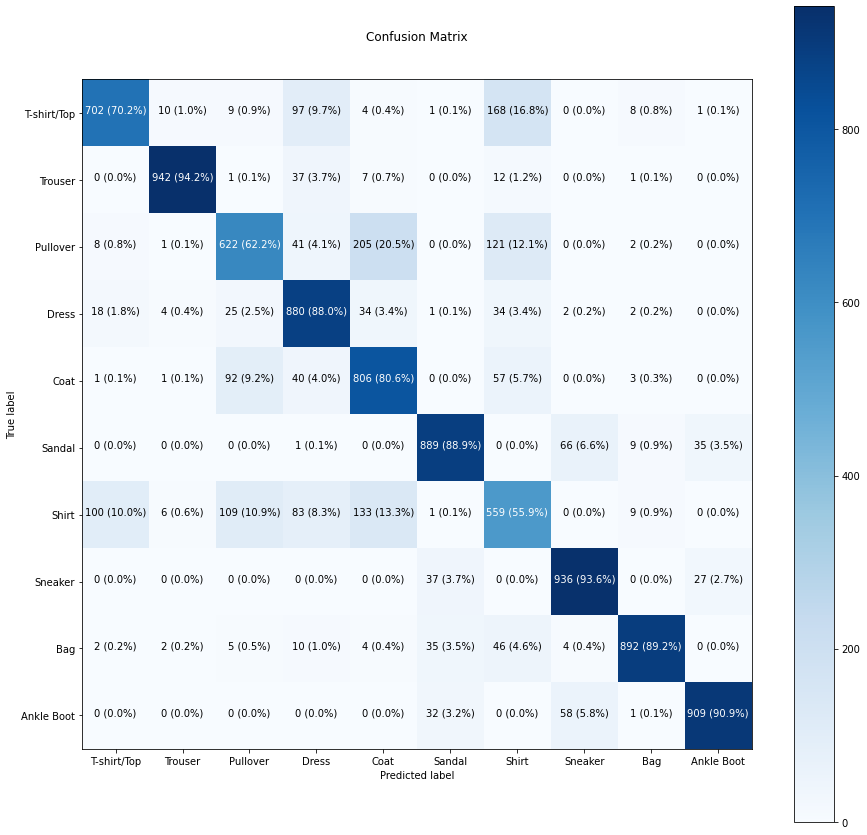

In [103]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [104]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

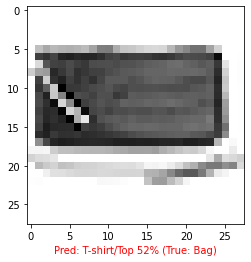

In [105]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=test_data_norm, 
                  true_labels=test_labels, 
                  classes=class_names)

## Patterns learned by the model 

In [106]:
# Find the layers of the model
model_4.layers

In [107]:
# Extract the first hidden Dense layer
weights, biases = model_4.layers[1].get_weights()

In [108]:
weights

array([[-0.46037793, -0.21167015, -0.39684257,  0.6022786 ],
       [-1.1104878 ,  1.2412436 ,  0.90393835,  0.20715818],
       [-1.0125997 ,  0.44408852, -0.00271604,  0.9813611 ],
       ...,
       [-0.0793565 , -0.09531148, -0.37768033,  0.2393988 ],
       [ 0.06709386, -0.8685542 , -0.11966953, -0.04976306],
       [ 0.02592114,  0.35151944, -0.18793838,  0.15606993]],
      dtype=float32)

In [109]:
weights.shape

(784, 4)

In [110]:
biases

array([2.4951127 , 1.8484484 , 0.69375765, 1.4737866 ], dtype=float32)

In [111]:
biases.shape

(4,)

In [113]:
from tensorflow.keras.utils import plot_model

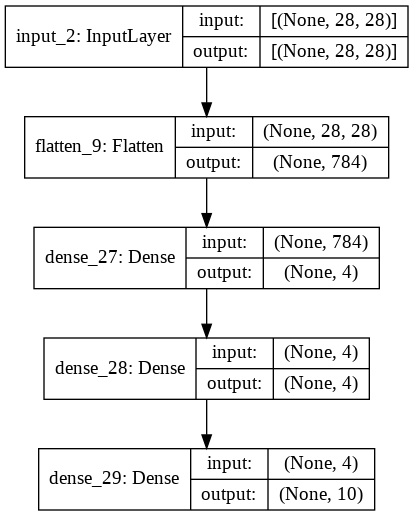

In [114]:
# Visulaize the model layers
plot_model(model_4, show_shapes=True)